In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [6]:
raw_data = pd.read_csv('./DATA/extra_Breast_Cancer.csv')


In [7]:
raw_data

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [8]:
data = raw_data.copy()

In [9]:
data['Race'] = data['Race'].map({'White':0, 'Black':1, 'Other':2})

In [10]:
data

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,0,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,0,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,0,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,0,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,0,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,0,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,1,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [11]:
data.describe()

,Age,Race,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,0.231362,30.473658,14.357107,4.158052,71.297962
std,8.963134,0.580485,21.119696,8.099675,5.109331,22.921430
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,0.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,0.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,0.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,2.000000,140.000000,61.000000,46.000000,107.000000


In [14]:
y = data['Survival Months'] # dependent variable	
x1 = data[['Tumor Size', 'Race']] # independent variable

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Survival Months   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.31
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.39e-07
Time:                        14:27:55   Log-Likelihood:                -18298.
No. Observations:                4024   AIC:                         3.660e+04
Df Residuals:                    4021   BIC:                         3.662e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.1886      0.647    114.587      0.000      72.919      75.458
Tumor Size    -0.0943      0.017     -5.530      0.000      -0.128      -0.061
Race          -0.0734      0.620     -0.118      0.906      -1.290       1.143
==============================================================================
Omnibus:                      192.551   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.694
Skew:                          -0.574   Prob(JB):                     1.19e-48
Kurtosis:                       3.010   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

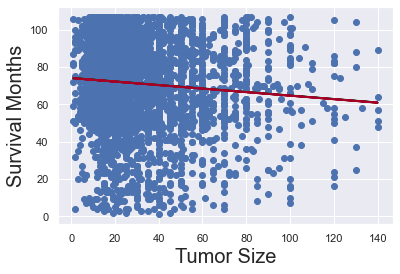

In [18]:
plt.scatter(data['Tumor Size'], y)
yhat_white = -0.0943*data['Tumor Size'] + 74.1886
yhat_black = -0.0943*data['Tumor Size'] + 74.1152 # 74.1886 +(-0.0734)
fig = plt.plot(data['Tumor Size'], yhat_white, lw=2, c='#006837')
fig = plt.plot(data['Tumor Size'], yhat_black, lw=2, c='#a50026')
plt.xlabel('Tumor Size', fontsize = 20)
plt.ylabel('Survival Months', fontsize = 20)
plt.show()

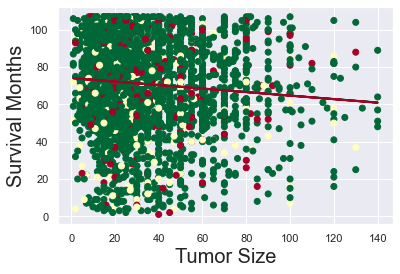

In [20]:
plt.scatter(data['Tumor Size'],y,c=data['Race'],cmap='RdYlGn_r')
yhat_white = -0.0943*data['Tumor Size'] + 74.1886
yhat_black = -0.0943*data['Tumor Size'] + 74.1152 # 74.1886 +(-0.0734)
fig = plt.plot(data['Tumor Size'], yhat_white, lw=2, c='#006837')
fig = plt.plot(data['Tumor Size'], yhat_black, lw=2, c='#a50026')
plt.xlabel('Tumor Size', fontsize = 20)
plt.ylabel('Survival Months', fontsize = 20)
plt.show()


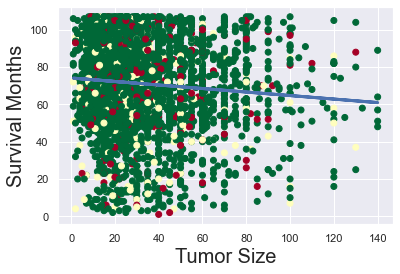

In [22]:
plt.scatter(data['Tumor Size'],data['Survival Months'], c=data['Race'],cmap='RdYlGn_r')
yhat_white = -0.0943*data['Tumor Size'] + 74.1886
yhat_black = -0.0943*data['Tumor Size'] + 74.1152 # 74.1886 +(-0.0734)
yhat = -0.0943*data['Tumor Size'] + 74.1721
fig = plt.plot(data['Tumor Size'], yhat_white, lw=2, c='#006837', label='regression line1')
fig = plt.plot(data['Tumor Size'], yhat_black, lw=2, c='#a50026', label='regression line2')
fig = plt.plot(data['Tumor Size'], yhat, lw=3, c='#4C72B0', label='regression line')
plt.xlabel('Tumor Size', fontsize = 20)
plt.ylabel('Survival Months', fontsize = 20)
plt.show()

Prediction

In [23]:
x

,const,Tumor Size,Race
0,1.0,4,0
1,1.0,35,0
2,1.0,63,0
3,1.0,18,0
4,1.0,41,0
...,...,...,...
4019,1.0,9,2
4020,1.0,46,0
4021,1.0,22,0
4022,1.0,44,1


In [28]:
new_data = pd.DataFrame({'const': 1, 'Tumor Size': [35], 'Race': [2]})
new_data = new_data[['const', 'Tumor Size', 'Race']]
new_data

,const,Tumor Size,Race
0,1,35,2


In [29]:
new_data.rename(index={0: 'hak'})


,const,Tumor Size,Race
hak,1,35,2


In [30]:
predictions = results.predict(new_data)
predictions


0    70.741323
dtype: float64

In [31]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0: 'hak'})

,const,Tumor Size,Race,Predictions
hak,1,35,2,70.741323
